<a href="https://colab.research.google.com/github/vnewsome/project_voting/blob/main/ML_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

**Data**

In [2]:
# ONLY RUN IF NEEDED (should be one time)
#! pip3 install mapclassify
#! pip3 install geopandas

In [5]:
# maping related packages
import geopandas as gpd
import mapclassify as mp
from mpl_toolkits.axes_grid1 import make_axes_locatable

# general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#! git clone https://github.com/vnewsome/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 164 (delta 47), reused 32 (delta 28), pack-reused 106
Receiving objects: 100% (164/164), 32.52 MiB | 7.25 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Updating files: 100% (48/48), done.


In [ ]:
# From the VA Dept of Emergency Management, get the shapefiles: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about
# From that archive, I uploaded the following files to Colab:
# VirginiaCounty_ClippedToShoreline.cpg
# VirginiaCounty_ClippedToShoreline.dbf
# VirginiaCounty_ClippedToShoreline.prj
# VirginiaCounty_ClippedToShoreline.shp
# VirginiaCounty_ClippedToShoreline.shp.xml
# VirginiaCounty_ClippedToShoreline.shx

In [16]:
# importing data for mapping **CHANGE GDF FILE LOCATION SPECIFIC TO YOUR DIRECTORY**
gdf = gpd.read_file("/content/project_voting/data/shapefiles/VirginiaCounty_ClippedToShoreline.shp") # Load Virginia shapefile for maps
cdf = pd.read_csv('/content/project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
mapdf = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [67]:
# summary of this code chuck:
# importing necessary libraries and storing the data in "votingdf"
# reading demographic data from three separate CSV representing different time periods: 2008-2012, 2012-2016, 2016-2020
# selecting the first columns and renaming appropriately, dropping the first row
# concatenate the dataframes into a single one "popchardf" and delete temporary files

# importing voting data, may need to add more county data here!
votingdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data

# get listed columns/variables from the file and rename them, and drop the first row
# looking at population, sex, race, education, and median household income
list1 = ['YEAR','STATE','COUNTY','QSEE001','QSEE002','QSEE026','QSQE002','QSQE003','QSQE004','QSQE005','QSQE006','QSQE007','QSQE008','QUSE002','QUSE017','QUSE018','QUSE019','QUSE020','QUSE021','QUSE022','QUSE023','QUSE024','QUSE025','QU1E001']
df1 = pd.read_csv('/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv',usecols=list1,encoding = "ISO-8859-1",low_memory=False) # 2008-2012 demographic data by area
df1 = df1.rename({'YEAR':'year','STATE':'state','COUNTY':'county','QSEE001':'population','QSEE002':'male pop','QSEE026':'female pop','QSQE002':'white','QSQE003':'black','QSQE004':'native american','QSQE005':'asian','QSQE006':'pacific islander','QSQE007':'other','QSQE008':'two or more','QUSE002':'no school','QUSE017':'high school diploma','QUSE018':'GED equivalent','QUSE019':'<1 year college','QUSE020':'>1 year college','QUSE021':'associates','QUSE022':'bachelors','QUSE023':'masters','QUSE024':'professional','QUSE025':'doctorate','QU1E001':'median household income'}, axis='columns')
df1 = df1.iloc[1: , :]

list2 = ['YEAR','STATE','COUNTY','AF2AE001','AF2AE002','AF2AE026','AF2ME002','AF2ME003','AF2ME004','AF2ME005','AF2ME006','AF2ME007','AF2ME008','AF4OE002','AF4OE017','AF4OE018','AF4OE019','AF4OE020','AF4OE021','AF4OE022','AF4OE023','AF4OE024','AF4OE025','AF49E001']
df2 = pd.read_csv('/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv',usecols=list2,encoding = "ISO-8859-1",low_memory=False) # 2012-2016 demographic data by area
df2 = df2.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AF2AE001':'population','AF2AE002':'male pop','AF2AE026':'female pop','AF2ME002':'white','AF2ME003':'black','AF2ME004':'native american','AF2ME005':'asian','AF2ME006':'pacific islander','AF2ME007':'other','AF2ME008':'two or more','AF4OE002':'no school','AF4OE017':'high school diploma','AF4OE018':'GED equivalent','AF4OE019':'<1 year college','AF4OE020':'>1 year college','AF4OE021':'associates','AF4OE022':'bachelors','AF4OE023':'masters','AF4OE024':'professional','AF4OE025':'doctorate','AF49E001':'median household income'}, axis='columns')
df2 = df2.iloc[1: , :]

list3 = ['YEAR','STATE','COUNTY','AMPKE001','AMPKE002','AMPKE026','AMPWE002','AMPWE003','AMPWE004','AMPWE005','AMPWE006','AMPWE007','AMPWE008','AMRZE002','AMRZE017','AMRZE018','AMRZE019','AMRZE020','AMRZE021','AMRZE022','AMRZE023','AMRZE024','AMRZE025','AMR8E001']
df3 = pd.read_csv('/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv',usecols=list3,encoding = "ISO-8859-1",low_memory=False) # 2016-2020 demographic data by area
df3 = df3.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AMPKE001':'population','AMPKE002':'male pop','AMPKE026':'female pop','AMPWE002':'white','AMPWE003':'black','AMPWE004':'native american','AMPWE005':'asian','AMPWE006':'pacific islander','AMPWE007':'other','AMPWE008':'two or more','AMRZE002':'no school','AMRZE017':'high school diploma','AMRZE018':'GED equivalent','AMRZE019':'<1 year college','AMRZE020':'>1 year college','AMRZE021':'associates','AMRZE022':'bachelors','AMRZE023':'masters','AMRZE024':'professional','AMRZE025':'doctorate','AMR8E001':'median household income'}, axis='columns')
df3 = df3.iloc[1: , :]

# combines data from 3 files into one dataframe
frames = [df1,df2,df3]
popchardf = pd.concat(frames)
del df1, df2, df3

In [18]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(popchardf)

,year,state,county,population,male pop,female pop,white,black,native american,asian,pacific islander,other,two or more,no school,high school diploma,GED equivalent,<1 year college,>1 year college,associates,bachelors,masters,professional,doctorate,median household income
1,2008-2012,Alabama,Autauga County,54590,26538,28052,43084,9880,169,439,0,212,806,636,9686,2188,2410,5332,2667,5085,1878,415,251,53773
2,2008-2012,Alabama,Baldwin County,183226,89270,93956,158259,17016,1038,1347,4,2645,2917,736,30682,5993,8459,21668,10370,23840,7880,2124,1463,50706
3,2008-2012,Alabama,Barbour County,27469,14749,12720,13448,12645,25,212,0,570,569,466,5095,1225,956,2564,1372,1613,839,224,81,31889
4,2008-2012,Alabama,Bibb County,22769,12154,10615,17459,4953,80,25,0,9,243,337,5694,763,675,2327,961,928,335,84,49,36824
5,2008-2012,Alabama,Blount County,57466,28489,28977,54507,754,230,97,0,1019,859,549,10875,3119,2509,5219,2770,3137,1210,334,111,45192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2016-2020,Puerto Rico,Vega Baja Municipio,51089,24420,26669,37840,2473,47,8,1,6222,4498,892,9644,815,581,3802,4167,5707,1776,182,283,20126
3218,2016-2020,Puerto Rico,Vieques Municipio,8508,4356,4152,3775,854,9,14,0,3645,211,244,2523,203,0,169,566,434,141,0,207,14040
3219,2016-2020,Puerto Rico,Villalba Municipio,21899,10589,11310,12216,944,0,0,0,2217,6522,310,5275,349,328,1362,1520,2413,474,51,32,19355
3220,2016-2020,Puerto Rico,Yabucoa Municipio,32867,15883,16984,4473,22270,0,0,0,5463,661,479,5634,506,224,3657,2847,3567,490,44,85,16828


In [19]:
votingdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [20]:
votingdf.describe()

,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


<Axes: >

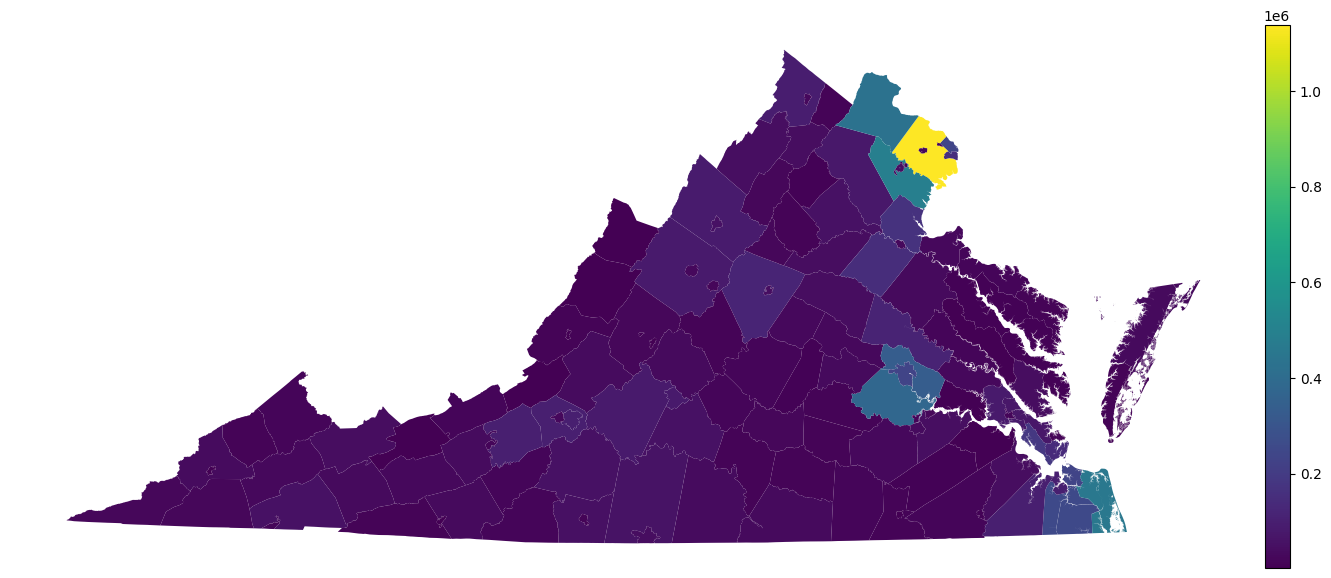

In [21]:
# purely an EXAMPLE taken from the provided code
# Example choropleth map showing 2022 population levels
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapdf.plot(ax=ax,column='Population2022',legend=True,cax=cax)

The section above shows how all relevant data was imported and organized. The provided starter code was used to correctly import the Virginia shape files for geopanda mapping. For extra county demographic data, the provided national county data by years was used. The year range looked at is 2008-2020. Of the variables collected, we chose to import the following: population, population by sex, race, education, and median household income. If desired, this information can be used from past elections to see if there are correlations to which way a county votes, and then applied to the upcoming 2024 election. The columns were renamed for easier use, and all columns can be seen in a dataframe above.

After making the dataframe though and exploring some modeling, a problem was encountered. A lot of the demographic data can be coupled with county voting data to find trends and patterns to see how education, race, sex, etc. can predict the majority party a county votes for. However, there is no demographic data for 2024, which means these models cannot be most accurately applied to this year's voting cycle. Recent demographic data was looked for but hard to come by. Instead, we think the best that can be done with this data is train/test splitting it and either applying the model to 2020 demographics or using the model to make general predictions. We can also ignore these demographic data points and just create models based on trends over time, or factor them in a little bit (for example, changes in population continuing on a similar trend over time).

**Results**

We start with the simplest model to make, which is just applying the 2020 voting data to each county in Virginia. With a near-guarantee rematch imminent, this prediction could hold some validity and predictive power.

In [22]:
# Some of the simplest models possible:
# Every county votes for the same candidate as they did in 2020. This is especially relevant with impending Biden vs. Trump rematch

# filter votingdf to only look at VA and US President to get election data
votevadf = votingdf[(votingdf['state_po']=='VA') & (votingdf['office']=='US PRESIDENT')]

# filter to only include data from 2020
# voteva2020df = votevadf[votingdf['year']==2020]
voteva2020df = votevadf[votevadf['year']==2020]

In [23]:
# winning candidate

# summary of this code chuck:
# grouping "voteva2020df" by column "county_fips" and calculates the max of candidate votes for each group
# transform to make sure the result aligns with the original index
# winning_rows = isolates the rows where the winning candidate recieved the highest number of votes for a particular county
# win2020df = creates a new df containing only th erows where the winning candidate received the highest number of votes
# win2020df.reset = resets the index and replacing it with the new one


max_candidatevotes = voteva2020df.groupby('county_fips')['candidatevotes'].transform('max')
winning_rows = voteva2020df[voteva2020df['candidatevotes']==max_candidatevotes]
win2020df = pd.DataFrame(winning_rows)
win2020df.reset_index(drop=True, inplace=True)


# combines map with the data on the winning candidate based on FIPS code
mapwin2020 = mapdf.copy()
mapwin2020 = mapwin2020.merge(win2020df,left_on='FIPS_left',right_on='county_fips')

<Axes: >

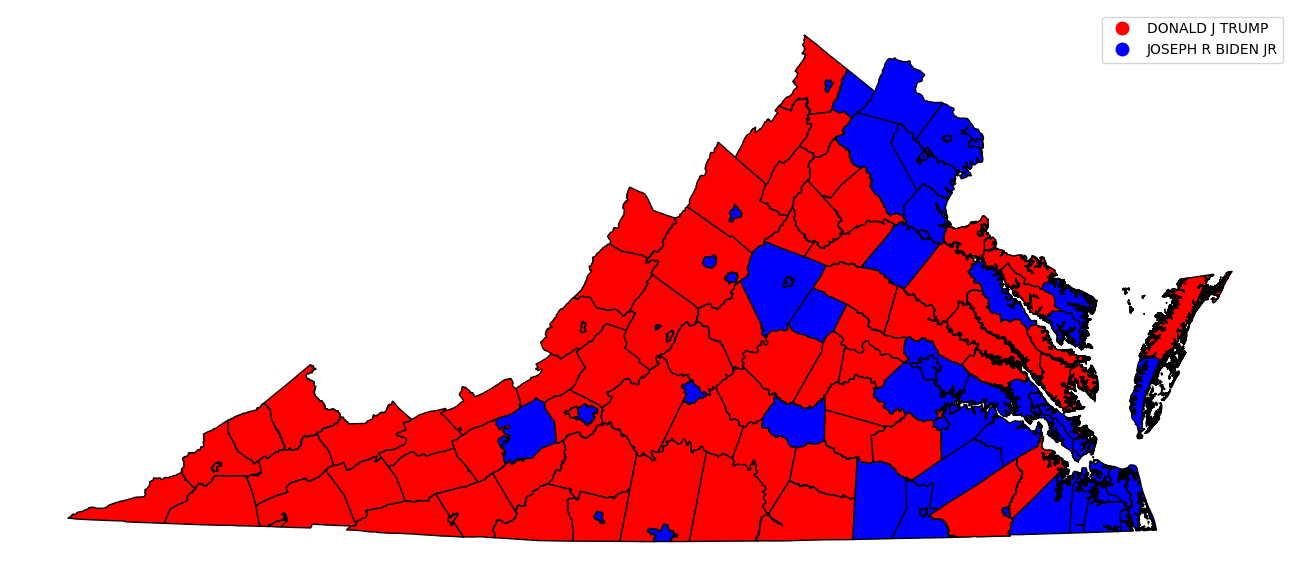

In [24]:
# map
fig = plt.figure()                                           # creates new figure object
ax = fig.add_axes([0, 0, 2, 2])                              # size and position of the axes
divider = make_axes_locatable(ax)                            # creates a divider object
ax.axis('off')                                               # turns off axis lines/ticks since it's not necessary
mapwin2020['candidate'] = win2020df['candidate'].astype(str)      # creates new column and takes values from "candidate" in the above df
mapwin2020.plot(ax=ax,column='candidate',cmap='bwr_r',legend=True,edgecolor='k')    # plots the df onto the axes "ax"

In [25]:
# Every county votes for the candidate from the party with the most wins from 2000-2020. If there is a tie, then the recent party holds tiebreaker.
# winning candidate


# similar to the code above
# group "votevadf" by year and fips code
# isolate the rows of the winning candidate in each county
# win_df = contains the rows where the winning candidate received the highest nunmber of votes in each county
# win_df.reset = resets the index of the df

max_candidatevotes = votevadf.groupby(['year','county_fips'])['candidatevotes'].transform('max')
winning_rows = votevadf[votevadf['candidatevotes']==max_candidatevotes]
win_df = pd.DataFrame(winning_rows)
win_df.reset_index(drop=True, inplace=True)

In [26]:
# percent of democratic wins

# counting the number of wins for each party in each county
# calculates the percentage of wins for the democratic party
# merging columns based on fips code
# dropping the no longer necessary columns

county_vote = win_df.groupby(['county_fips', 'party']).size().unstack(fill_value=0)
county_vote['percent_D_wins'] = county_vote['DEMOCRAT'] / county_vote['REPUBLICAN'] # I can't do math this probably could be done better
county_win = pd.merge(win_df, county_vote, on='county_fips', how='left')
county_win.drop(columns=['DEMOCRAT','OTHER','REPUBLICAN'], inplace=True)

county_win

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,percent_D_wins
0,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,0.0
1,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL,5.0
2,11170,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL,0.0
3,11174,2000,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2947,4788,20220315,TOTAL,0.0
4,11178,2000,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6660,11712,20220315,TOTAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,71911,2020,VIRGINIA,VA,SUFFOLK CITY,51800,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,20922,49642,20220315,ABSENTEE,5.0
801,71923,2020,VIRGINIA,VA,VIRGINIA BEACH CITY,51810,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,81003,227717,20220315,ABSENTEE,0.2
802,71935,2020,VIRGINIA,VA,WAYNESBORO CITY,51820,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,3799,10717,20220315,ABSENTEE,0.2
803,71947,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,4035,6890,20220315,ABSENTEE,5.0


In [27]:
mapwin = mapdf.copy()
mapwin = mapwin.merge(win_df,left_on='FIPS_left',right_on='county_fips')

<Axes: >

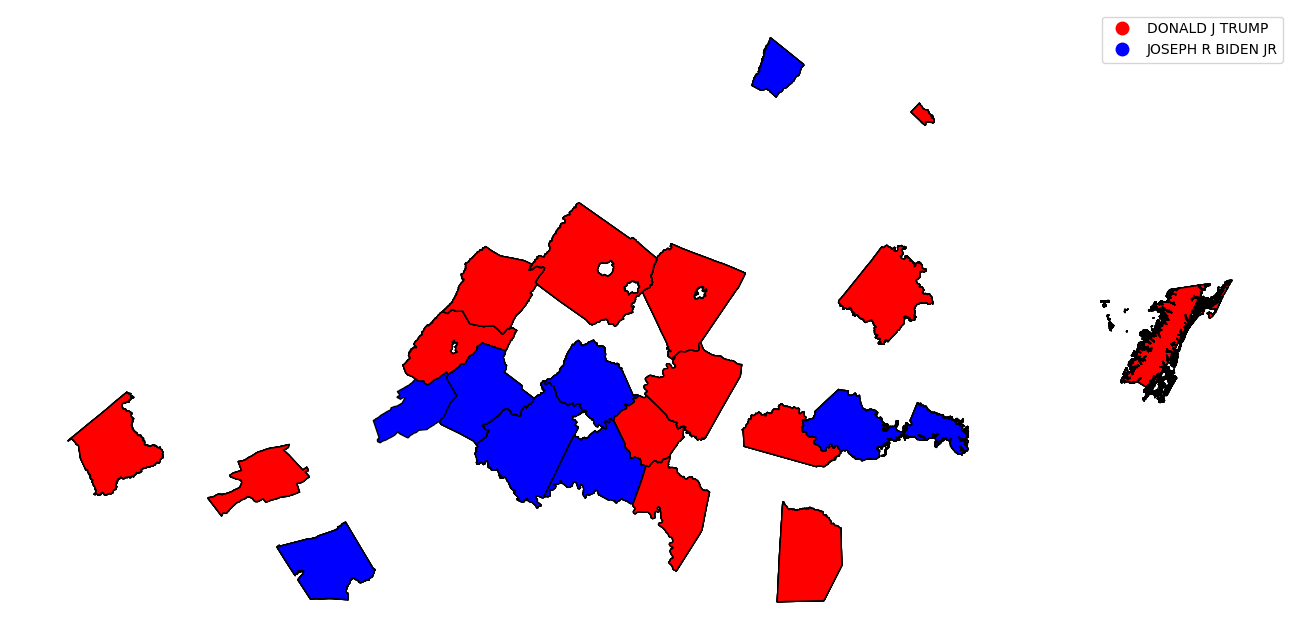

In [28]:
## playing around with some things-- *feel free to delete*

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
mapwin['candidate'] = win2020df['candidate'].astype(str)
mapwin.plot(ax=ax,column='candidate',cmap='bwr_r',legend=True,edgecolor='k')

In [ ]:
# Populations above the VA mean size vote D; populations below the VA mean size vote R.

In [ ]:
# Populations majority female vote D; populations majority male vote R.

In [ ]:
# Populations majority non-white vote D; populations majority white vote R.

In [ ]:
# Populations majority associate's degree or below vote D; populations majority bachelor's degree or above vote R.

In [ ]:
# Populations above the VA median household income vote D; populations above the VA median household income vote R.

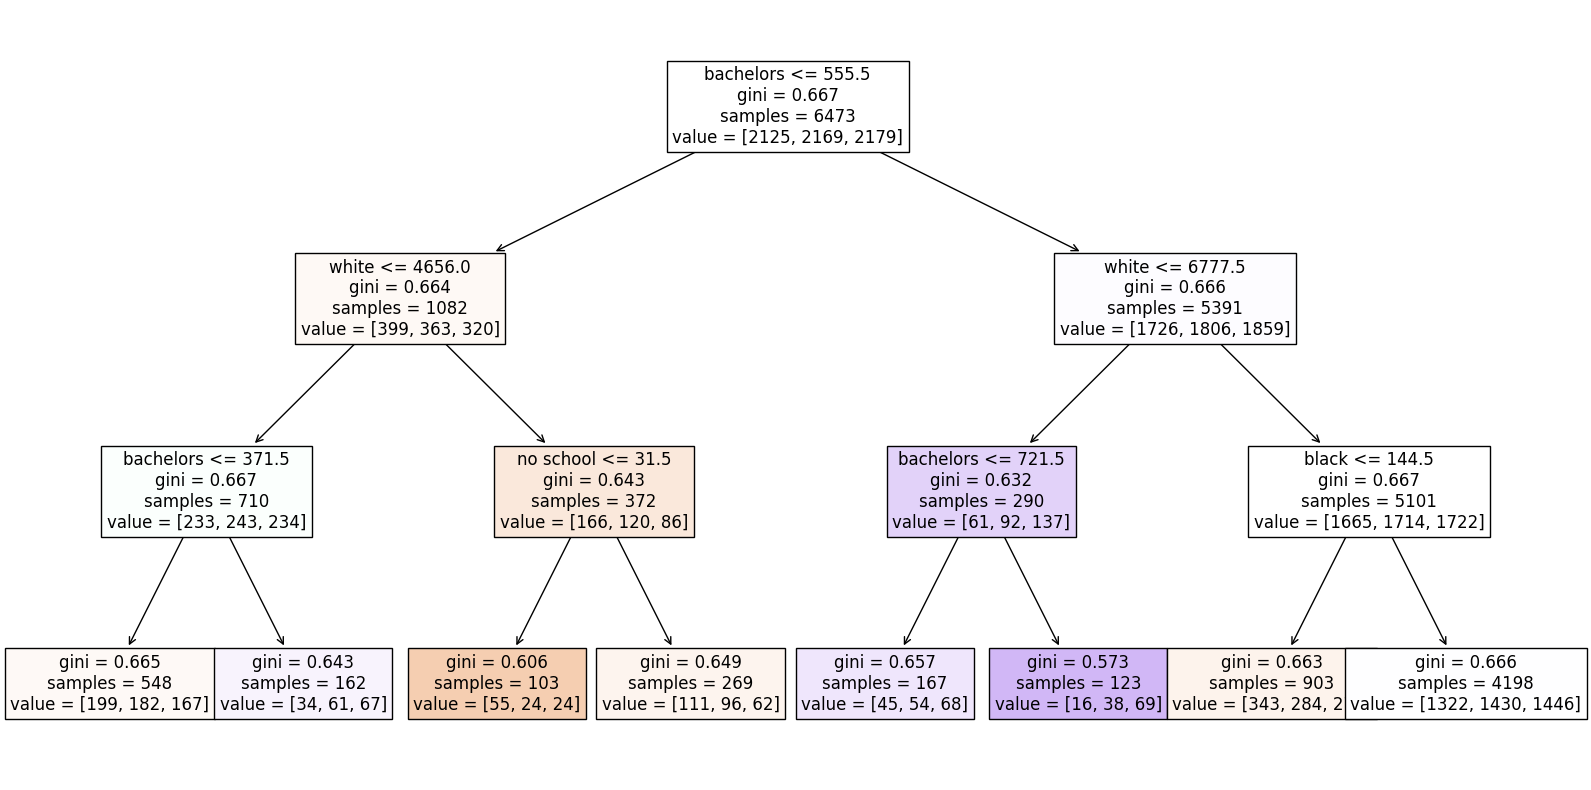

Tree rsq:  0.3586214034361416


In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree

# Process data:
vars = ['white', 'black', 'no school', 'bachelors']
y = popchardf['year']
X = popchardf.loc[:,vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=100) # Create a classifier object, limit depth to 3 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier


# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names=vars)
plt.show()

# Compute R-squared error:
X_test = popchardf.loc[:,vars]
y_test = popchardf['year']
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test)) # R-squared

**Conclusion**